# EDA Assignment

## Loading Packages 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
sns.set(style="white")

## Reading The Dataset

In [2]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

## Variable Identification

In [3]:
# Dimensions of dataset
df.shape

(729322, 11)

In [4]:
# Get names of variables in the dataset
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
# Display first few rows of the data set
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
# identifying variables types and checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null object
dropoff_datetime      729322 non-null object
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


The dataset has 5 numerical variables  and 6 categorical variables. Variables of type 'float64' and 'int64' are numerical whereas those of type 'object'. However from using business sense one can tell that the vendor_id is categorical although expressed as int64. NB: categorical variables may also take numerical values. Trip duration, the target variable, is of numerical type. There are no missing values in the data set.

## Univariate Analysis

### Univariate For Numerical Variables

In [7]:
# identify and group numerical variables 
numeric_cols = ['passenger_count', 'pickup_longitude', 'pickup_latitude', 
                'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

# Analyse numerical variables using Tabular Method - Statistics 5-Number Summary
df[numeric_cols].describe()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


#### Key Observations

a) Data shows that in most cases the number of passengers in each trip is between 1 and 2 persons.

b) Mean and median  are similar for pickup and dropoff variables. Data suggest less to no presence of outliers

c) Trip duration data is more spread out with high standard deviation. Looking at the Min-Max values relative to 1st and 3rd quartiles one could say there are huge outliers. some trips are very short whereas others are take too long.

d) There are no missing values for numerical variables


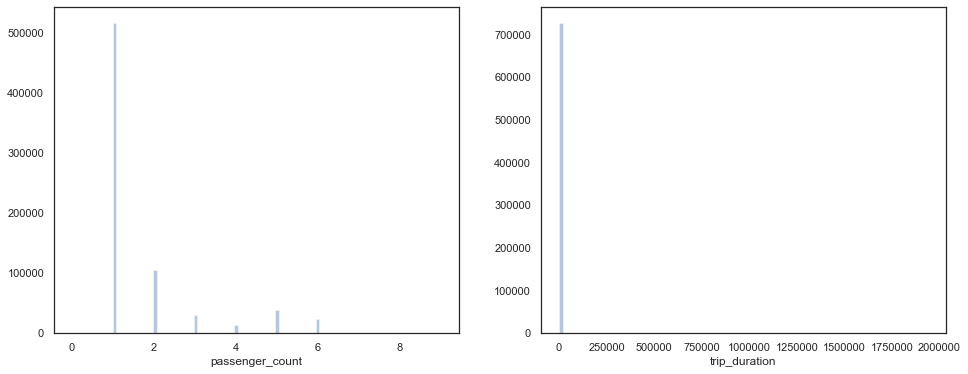

In [8]:
# Plot passenger count and trip duration distribution
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))
sns.distplot(df['passenger_count'], kde = False, bins = 100, ax = ax1)
sns.distplot(df['trip_duration'], kde = False, bins = 100, ax = ax2)
plt.show()

Passenger count data is skewed to the right with the mean greater than the median. Distribution of trip duration cannot be determine due to presence of huge outliers. log transformation will be performed on the trip duration and then check if distribution appears. 

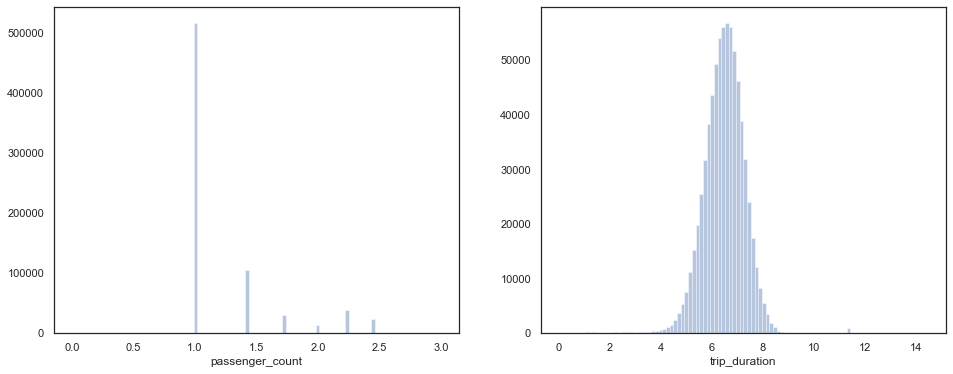

In [9]:
#Square root transformation on passenger count variable
sq_pass= np.sqrt(df['passenger_count'])
#log transformation on trip duration
log_trip = np.log(df['trip_duration'])

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

sns.distplot(sq_pass, kde = False, bins = 100, ax=ax1)
sns.distplot(log_trip, kde = False, bins = 100, ax=ax2)
plt.show()

Square root transformation on passenger_count does not solve the skewness. Most of the time there is only one pass in a trip.
Trip duration variable responded well to log transformation a it resulted in normal distribution. Many models works well when variables have normal distribution.

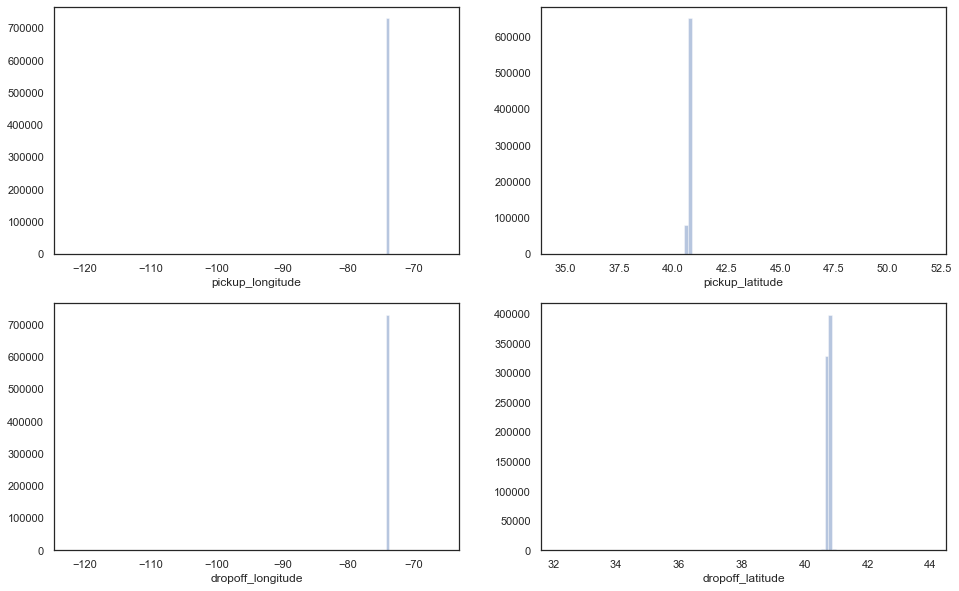

In [10]:
# Plot passenger count and trip duration distribution
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16, 10))

sns.distplot(df['pickup_longitude'], kde = False, bins = 100, ax = ax[0,0])
sns.distplot(df['pickup_latitude'], kde = False, bins = 100, ax = ax[0,1])
sns.distplot(df['dropoff_longitude'], kde = False, bins = 100, ax = ax[1,0])
sns.distplot(df['dropoff_latitude'], kde = False, bins = 100, ax = ax[1,1])
plt.show()

Distribution of Latitudes and longitudes variables is not easy to interpret. One can create a travel distance variable using these coordinates and then plot its distribution

In [11]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [12]:
from geopy.distance import geodesic 

In [13]:
#Create a distance variable from latitudes and longitudes variables using the Haversine formula

Olat = df['pickup_latitude']
Olon = df['pickup_longitude']
Dlat = df['dropoff_latitude']
Dlon = df['dropoff_longitude']

radius = 6371  # the radious of earth in km

d_lat = np.radians(Dlat - Olat)
d_lon = np.radians(Dlon - Olon)

#Harvesine formula
a = (np.sin(d_lat / 2)*np.sin(d_lat / 2) + 
     np.cos(np.radians(Olat))*np.cos(np.radians(Dlat))*np.sin(d_lon / 2)* np.sin(d_lon / 2))
c = 2*np.arctan2(np.sqrt(a), np.sqrt(1. - a))
d = radius* c # travel distance in km

In [14]:
#add travel distance to the dataframe
df['travel_distance'] = d
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,travel_distance
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199073
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129111
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250753
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361097
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328534


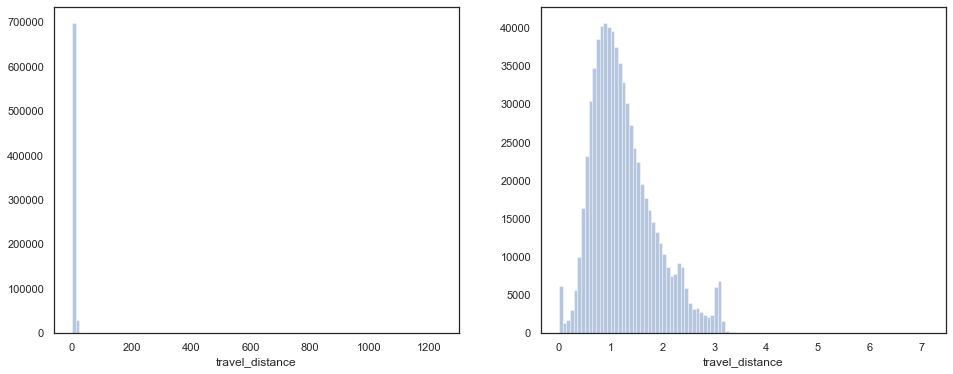

In [15]:
#Travel Distance distribution

log_travel = np.log(df['travel_distance']+1) # add  a constant 1 to log equation to handle zero value that gives 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

sns.distplot(df['travel_distance'], kde = False, bins = 100, ax=ax1)
sns.distplot(log_travel, kde = False, bins = 100, ax=ax2)
plt.show()

Transformed travel distance plot gives a better and clear distribution which can be seen as slightly right skewed

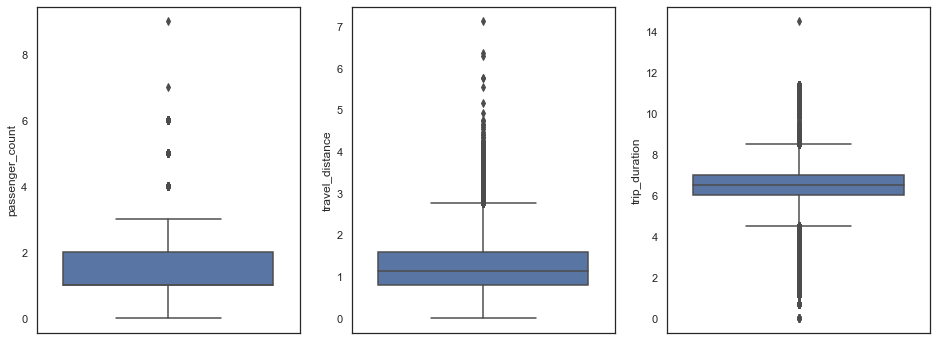

In [16]:
#Box plots on transformed numerical variables to detect outliers
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 6))

sns.boxplot(df['passenger_count'], orient='vertical', ax=ax1)
sns.boxplot(log_travel, orient='vertical', ax=ax2)
sns.boxplot(log_trip, orient='vertical', ax=ax3)
plt.show()

All numerical variables have outliers. Passenger count and travel distance have outliers only in the higher end. trip duration has outliers in both lower and higher end. Passenger count median value is the same as the first quartile hence no third bar line in the boxplot.

### Univariate Analysis for Categorical Variables

In [17]:
df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
travel_distance       float64
dtype: object

In [18]:
df['id'].value_counts()

id0310904    1
id1088220    1
id2300938    1
id1753579    1
id3363902    1
            ..
id0476831    1
id0902557    1
id1834780    1
id3090334    1
id0712739    1
Name: id, Length: 729322, dtype: int64

ID is a categorical variable which is unique for each observation. unique feature should be excluded in order to get good general analysis of the data.

In [19]:
df['vendor_id'].value_counts()

2    390481
1    338841
Name: vendor_id, dtype: int64

In [20]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

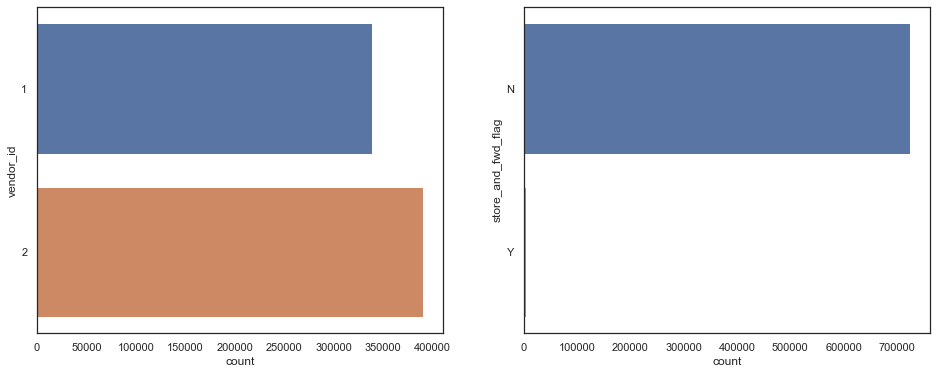

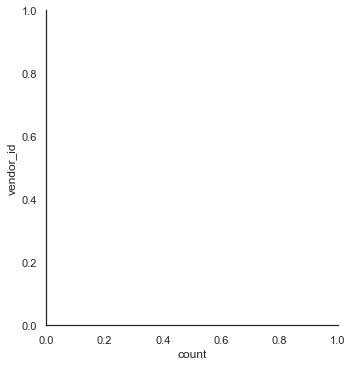

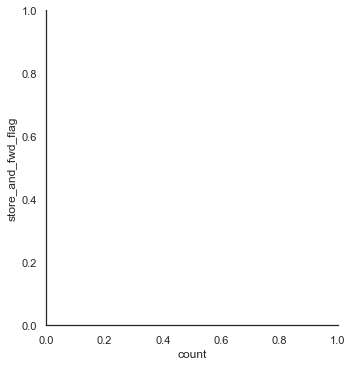

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

sns.catplot(y="vendor_id", kind="count", data=df, ax=ax1)
sns.catplot(y="store_and_fwd_flag", kind="count", data=df, ax=ax2)
plt.show()

There are two vendors providing trip service. Vendor 1 is used less frequently than vendor 2. Nearly all the trips not a store and forward trip. There are only 4000 trips where you store at a store to buy something before final dropoff is reached.

In [22]:
df['pickup_datetime'].value_counts()

2016-06-11 20:17:45    4
2016-02-24 12:04:42    4
2016-03-03 10:48:41    4
2016-03-12 12:18:11    4
2016-05-20 09:03:18    4
                      ..
2016-01-24 23:22:12    1
2016-05-26 12:21:26    1
2016-02-14 12:47:30    1
2016-03-08 11:42:43    1
2016-05-14 10:32:26    1
Name: pickup_datetime, Length: 709359, dtype: int64

Date_time variables have many observations that are unique due to inclusion of time component. To get good exploration, these variables need to be split into Year, Month, Day and hour component of time.

In [23]:
#convert from object to datetime series
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

#Split into year, month, day, hour and minutes
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_minute'] = df['pickup_datetime'].dt.minute

In [24]:
#convert from object to datetime series
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

#Split into year, month, day, hour and minutes
df['dropoff_year'] = df['dropoff_datetime'].dt.year
df['dropoff_month'] = df['dropoff_datetime'].dt.month
df['dropoff_day'] = df['dropoff_datetime'].dt.day
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour
df['dropoff_minute'] = df['dropoff_datetime'].dt.minute

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 22 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null datetime64[ns]
dropoff_datetime      729322 non-null datetime64[ns]
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
travel_distance       729322 non-null float64
pickup_year           729322 non-null int64
pickup_month          729322 non-null int64
pickup_day            729322 non-null int64
pickup_hour           729322 non-null int64
pickup_minute         729322 non-null int64
dropoff_year          729322 non-null int64
dropoff_month         729322 non-null int64
dropoff_day           7

Variables of year, month of the year, day of the month, hours of the day and minutes of hours are shown as type int64. Months, days and hours here are cyclic and descrete and therefore categorical. Minutes can be excluded from your analysis since one already has other time components.

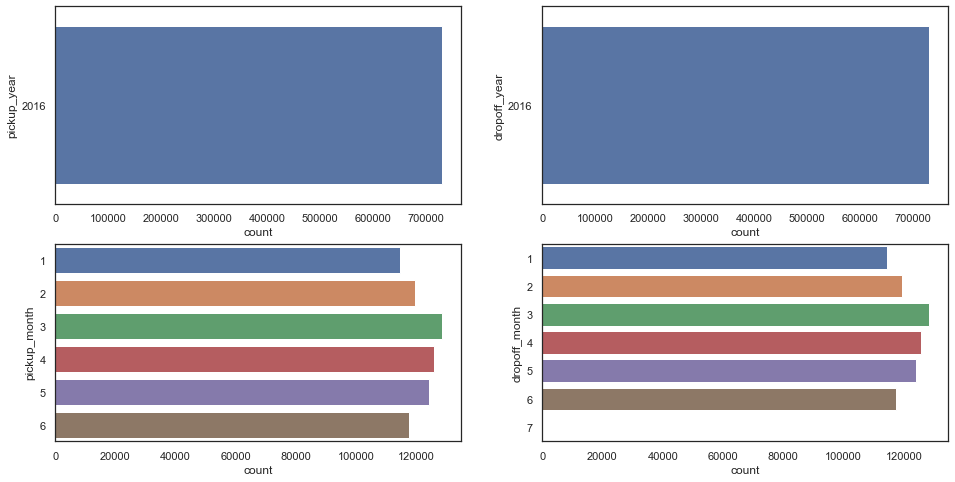

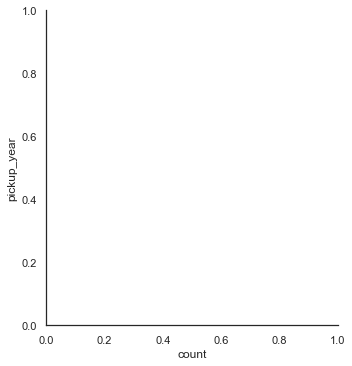

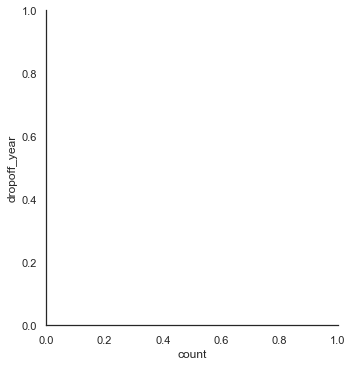

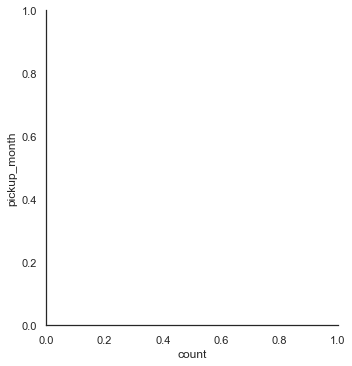

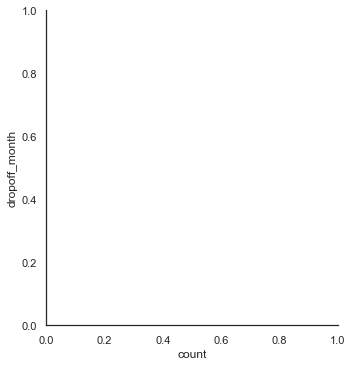

In [26]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16, 8))

sns.catplot(y="pickup_year", kind="count", data=df, ax=ax[0,0])
sns.catplot(y="dropoff_year", kind="count", data=df, ax=ax[0,1])
sns.catplot(y="pickup_month", kind="count", data=df, ax=ax[1,0])
sns.catplot(y="dropoff_month", kind="count", data=df, ax=ax[1,1])

plt.show()

The year and month variables insights about when was the data collected and for how long. In this instance the data was collected in 2016 and for six months period (Jan-Jun). Number of pickups and dropoff are highest on the 3rd month. There is an increasing monthly trend in the first quarter and a decreasing one in second quarter.

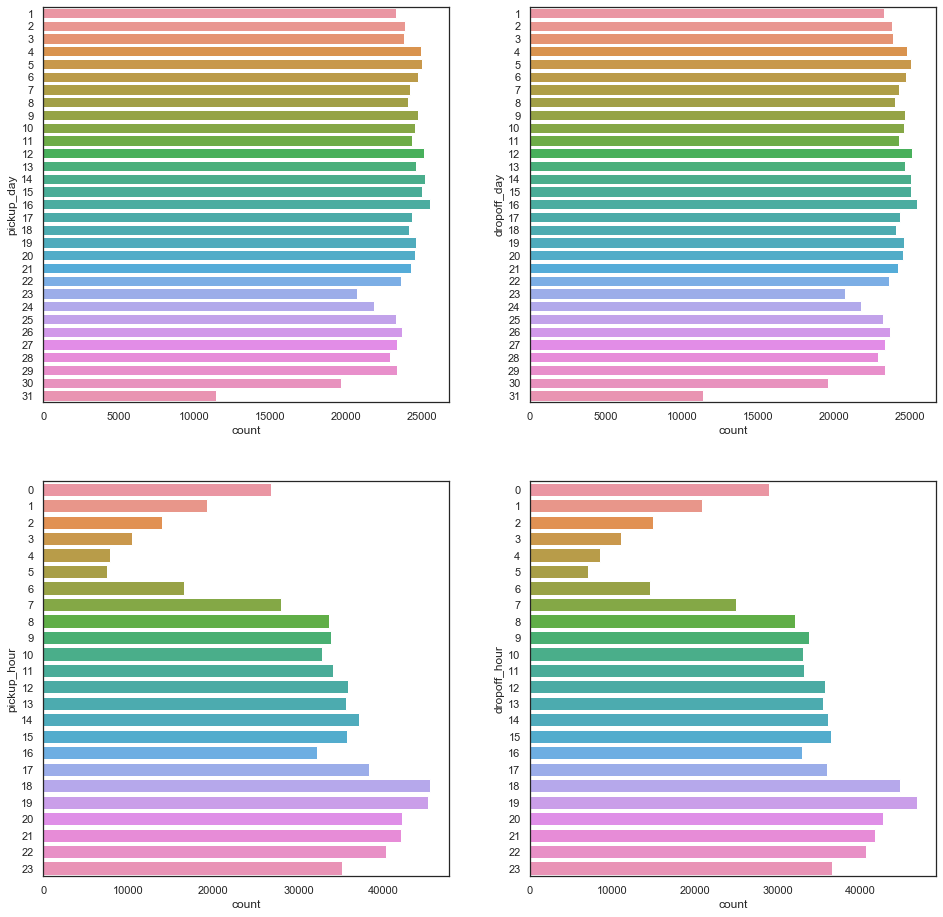

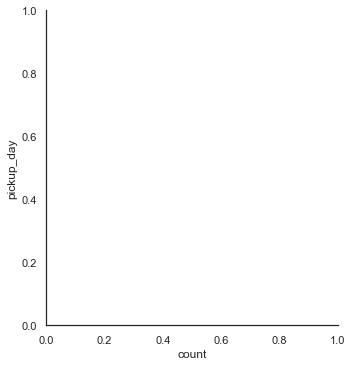

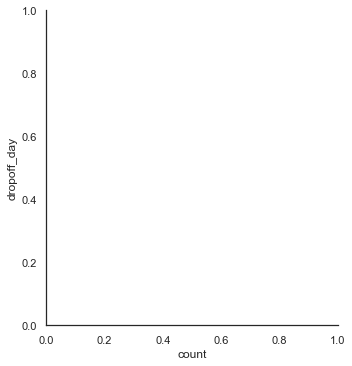

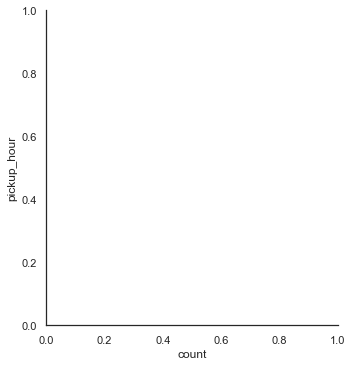

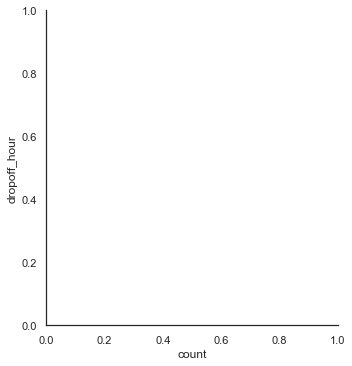

In [27]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(16, 16))
sns.catplot(y="pickup_day", kind="count", data=df, ax=ax[0,0])
sns.catplot(y="dropoff_day", kind="count", data=df, ax=ax[0,1])
sns.catplot(y="pickup_hour", kind="count", data=df, ax=ax[1,0])
sns.catplot(y="dropoff_hour", kind="count", data=df, ax=ax[1,1])
plt.show()

There is a slight increase in number of trips from the beginning to the 2nd last week of the month.The number of trips drop at month end. Number of trips are lowest at 05h00 am then rise up until 19h00 pm (peak) and afterwards start to drop.

## Bivariate Analysis

### Bivariate Analysis for continuous variables

In [28]:
#continuous variable after transformation
df['log_trip']=log_trip
df['log_travel'] = log_travel

cont_trans =['passenger_count', 'log_travel', 'log_trip']

#correlation of continuous variables
df[cont_trans].corr()

,passenger_count,log_travel,log_trip
passenger_count,1.000000,0.010333,0.020824
log_travel,0.010333,1.000000,0.749243
log_trip,0.020824,0.749243,1.000000


1. Strong positive correlation between travel distance and trip duration. It will take longer when number of traveling  kilometres increases.
2. Passenger count is correlated to neither travel distance nor trip duration. Number of passengers does not determine trip distance nor how long it will take.

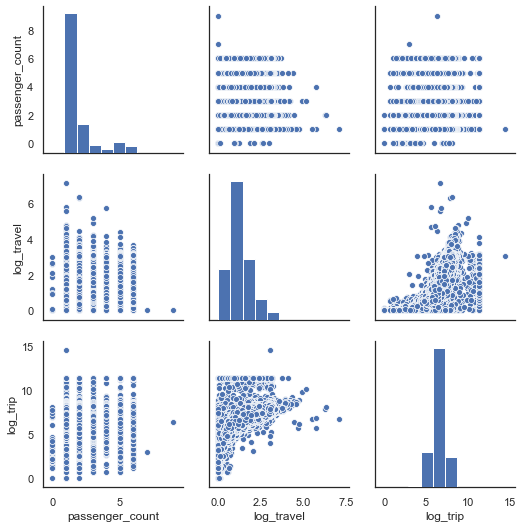

In [29]:
sns.pairplot(df[cont_trans]);

### Bivariate Analysis for Categorical Variables

Categorical to Categorical variables will be analysed using the frequency tables. Chi-square value and pvalue will be used for statitical analysis of these variables. Higher Chi-square values and lower pvalues (<0.05) mean the two variables are related and the outcomes are not just random.

In [56]:
#import chi2_contingency chi-squared test of cat-cat variables
from scipy.stats import chi2_contingency

In [31]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
travel_distance              float64
pickup_year                    int64
pickup_month                   int64
pickup_day                     int64
pickup_hour                    int64
pickup_minute                  int64
dropoff_year                   int64
dropoff_month                  int64
dropoff_day                    int64
dropoff_hour                   int64
dropoff_minute                 int64
log_trip                     float64
log_travel                   float64
dtype: object

In [32]:
# Crosstab and Chi-square to find the relationship between categorical variables
pd.crosstab(df['vendor_id'],df['store_and_fwd_flag'])

store_and_fwd_flag,N,Y
vendor_id,,
1,334801,4040
2,390481,0


In [33]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['vendor_id'],df['store_and_fwd_flag']))
print(chi2, p, dof)

4679.472808812227 0.0 1


There is a relationship between vendor_id and store and fwd flag variables as shown  by high Chi-sqr value and p-vale of zero. 

In [34]:
pd.crosstab(df['vendor_id'],df['pickup_month'])

pickup_month,1,2,3,4,5,6
vendor_id,,,,,,
1,52660,55151,59394,58786,57928,54922
2,61741,64213,68922,66848,66273,62484


In [35]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['vendor_id'],df['pickup_month']))
print(chi2, p, dof)

25.140223702712312 0.00013091000924850705 5


Trips made by each vendor id are different for for each month

In [36]:
pd.crosstab(df['vendor_id'],df['pickup_day'])

pickup_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
vendor_id,,,,,,,,,,,,,,,,,,,,,
1,10734,11092,11081,11702,11675,11538,11247,11174,11559,11423,...,10981,9649,10054,10726,11041,10948,10663,10888,9064,5386
2,12559,12807,12777,13256,13355,13219,13007,12939,13170,13152,...,12646,11108,11823,12562,12668,12428,12253,12503,10578,6003


In [37]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['vendor_id'],df['pickup_day']))
print(chi2, p, dof)

28.606378923808915 0.5383366765159052 30


Pick up day has no effect on the number of trips made by each provider as indicated by high p-value and low chi-square.

In [38]:
pd.crosstab(df['vendor_id'],df['pickup_hour'])

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
vendor_id,,,,,,,,,,,,,,,,,,,,,
1,12288,8943,6843,5145,3900,3819,8062,13011,15746,15569,...,17519,16957,15090,17431,20679,20749,19320,19163,18425,16310
2,14438,10300,7117,5279,3927,3702,8490,14896,17866,18252,...,19601,18730,17057,20882,24725,24513,22845,22882,21868,18759


In [39]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['vendor_id'],df['pickup_hour']))
print(chi2, p, dof)

328.1956588745221 8.806416173533979e-56 23


Both providers have high number of trips in the afternoon and lower in the early morning. Time of the day has a huge impact on the number of trips made by each provider.

In [40]:
pd.crosstab(df['store_and_fwd_flag'],df['pickup_month'])

pickup_month,1,2,3,4,5,6
store_and_fwd_flag,,,,,,
N,113747,118721,127637,124891,123562,116724
Y,654,643,679,743,639,682


In [41]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['store_and_fwd_flag'],df['pickup_month']))
print(chi2, p, dof)

10.844653646646435 0.05454853982791516 5


Low chi-square and p-value higher than 0.05 means that the two categorical variables  (pick_up month and store & fwd flag) have no relationship with each other

In [42]:
pd.crosstab(df['store_and_fwd_flag'],df['pickup_day'])

pickup_day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
store_and_fwd_flag,,,,,,,,,,,,,,,,,,,,,
N,23166,23759,23741,24844,24890,24630,24128,23981,24595,24447,...,23476,20653,21767,23164,23589,23248,22762,23272,19552,11322
Y,127,140,117,114,140,127,126,132,134,128,...,151,104,110,124,120,128,154,119,90,67


In [43]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['store_and_fwd_flag'],df['pickup_day']))
print(chi2, p, dof)

56.59183202512241 0.0023332447459687555 30


Number of store and fwd flag trips are not the same each day. Some days the there are slightly more trips where they first stop at a store.

In [44]:
pd.crosstab(df['store_and_fwd_flag'],df['pickup_hour'])

pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
store_and_fwd_flag,,,,,,,,,,,,,,,,,,,,,
N,26606,19151,13883,10370,7792,7486,16461,27776,33438,33639,...,36882,35443,31920,38086,45145,44998,41968,41840,40072,34893
Y,120,92,77,54,35,35,91,131,174,182,...,238,244,227,227,259,264,197,205,221,176


In [45]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['store_and_fwd_flag'],df['pickup_hour']))
print(chi2, p, dof)

61.48535812737565 2.3236633041888087e-05 23


There are less store and fwd flag trips early in the morning,then rises from 6h00 am up to 19:00 pm. In general the more the number of all trips the more the store and fwd flag trips. High Chi value and low pvalue confirms the trend.

### Bivariate Analysis of Continuous and Categorical Variables

Bar plot will be used for Cont-Cat variables graphical analaysis. Two sample t-test will be use for statistical analysis to check if there is a relationship between categorical and numerical variables. T-test will give t-value and pvalue. T-value will be compared against T-critical using 95% confidence (alpha=0.05). If T-value is larger than the T-critical then there is a relationship between cat and cont variables. pvalue lower than 5% (0.05) is good as it means the relationship between the two variables is not by chance.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 24 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null datetime64[ns]
dropoff_datetime      729322 non-null datetime64[ns]
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
travel_distance       729322 non-null float64
pickup_year           729322 non-null int64
pickup_month          729322 non-null int64
pickup_day            729322 non-null int64
pickup_hour           729322 non-null int64
pickup_minute         729322 non-null int64
dropoff_year          729322 non-null int64
dropoff_month         729322 non-null int64
dropoff_day           7

In [47]:
#importing the scipy library for ttest in order to perfom 2 sample ttest

from scipy.stats import ttest_ind

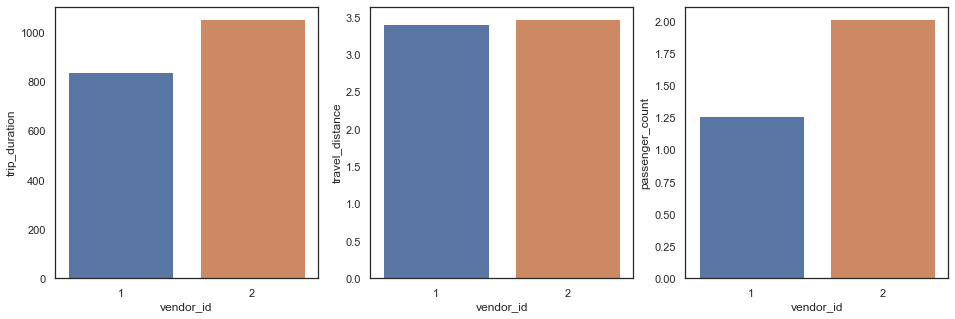

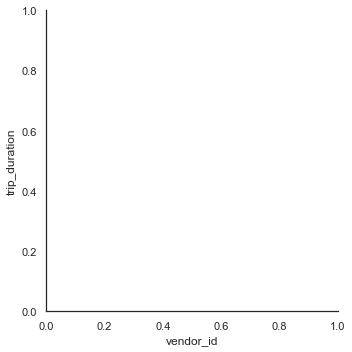

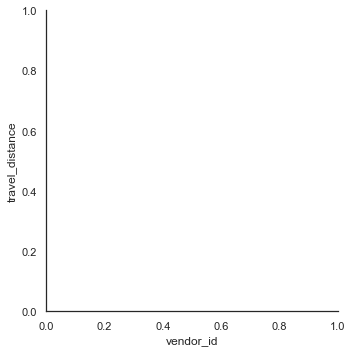

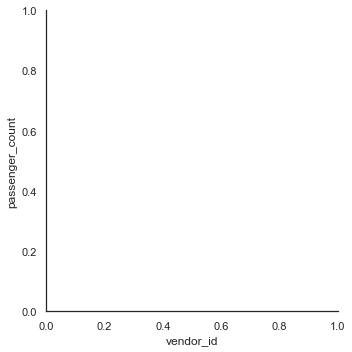

In [48]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,5))
sns.catplot(x="vendor_id", y="trip_duration",kind="bar",data=df, ci=None, ax=ax1)
sns.catplot(x="vendor_id", y="travel_distance",kind="bar",data=df, ci=None, ax=ax2)
sns.catplot(x="vendor_id", y="passenger_count",kind="bar",data=df, ci=None, ax=ax3)
plt.show()

In [49]:
#2 sample t-test for variables vendor id and continuous variables
duration=ttest_ind(df[df['vendor_id']==1]['trip_duration'],df[df['vendor_id']==2]['trip_duration'],nan_policy='omit')
distance=ttest_ind(df[df['vendor_id']==1]['travel_distance'],df[df['vendor_id']==2]['travel_distance'],nan_policy='omit')
passengers=ttest_ind(df[df['vendor_id']==1]['passenger_count'],df[df['vendor_id']==2]['passenger_count'],nan_policy='omit')

print([duration.statistic, duration.pvalue], [distance.statistic, distance.pvalue], [passengers.statistic, passengers.pvalue])

[-23.709229260516818, 3.228422510941252e-124] [-5.5596636354716145, 2.703892604209501e-08] [-255.3408904124244, 0.0]


the trip duration, travel distance and passenger count differs between the two providers. Vendor_ID No. 2 is performing better than No. 1 is it has more trip hours, more km of travels and higher number of passengers in a vehicle on average. Graphical method shows how each vendor if performing. T-values are higher t-critical (2 @95% and over 1000 DF) and pvalues are very low.

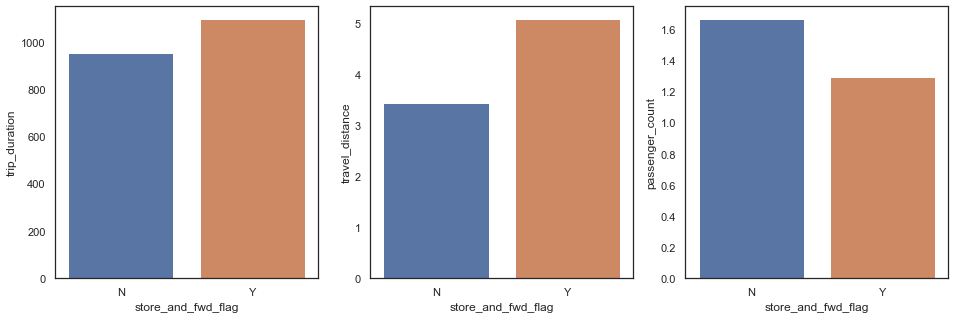

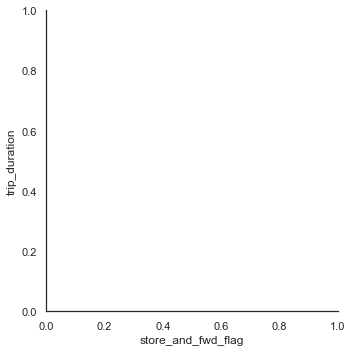

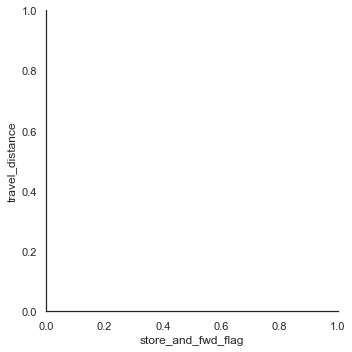

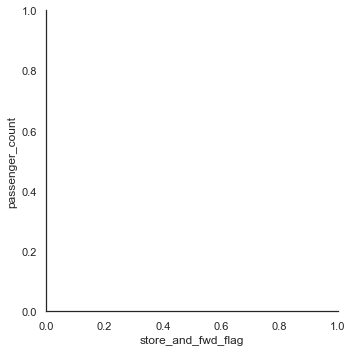

In [50]:
#store_and_fwd_flag
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,5))
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="bar",data=df, ci=None, ax=ax1)
sns.catplot(x="store_and_fwd_flag", y="travel_distance",kind="bar",data=df, ci=None, ax=ax2)
sns.catplot(x="store_and_fwd_flag", y="passenger_count",kind="bar",data=df, ci=None, ax=ax3)
plt.show()

In [51]:
#2 sample t-test for variables store_and_fwd_flag and continuous variables
duration1=ttest_ind(df[df['store_and_fwd_flag']=='N']['trip_duration'],df[df['store_and_fwd_flag']=='Y']['trip_duration'],nan_policy='omit')
distance1=ttest_ind(df[df['store_and_fwd_flag']=='N']['travel_distance'],df[df['store_and_fwd_flag']=='Y']['travel_distance'],nan_policy='omit')
passengers1=ttest_ind(df[df['store_and_fwd_flag']=='N']['passenger_count'],df[df['store_and_fwd_flag']=='Y']['passenger_count'],nan_policy='omit')

print([duration1.statistic, duration1.pvalue], [distance1.statistic, distance1.pvalue], [passengers1.statistic, passengers1.pvalue])

[-2.3523283156508374, 0.018656564164188774] [-23.877406154735514, 5.8810964848197105e-126] [17.851210574040426, 2.92918034686304e-71]


The trip duration and travel distance are obviously longer when taxi first stops at the store. There are fewer stops along the way when there is more than one passenger in a vehicle. For trip duration vs store and fwd flag, T-value is higher than tcritical by a small margin and pvalue not very low; more observations may be needed in order to validate the relationship.

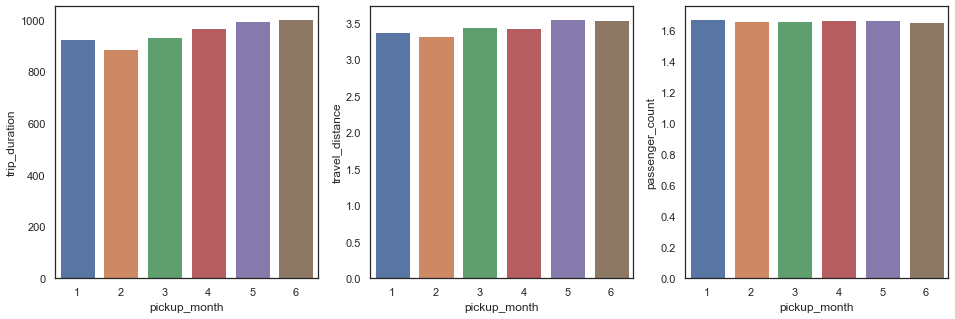

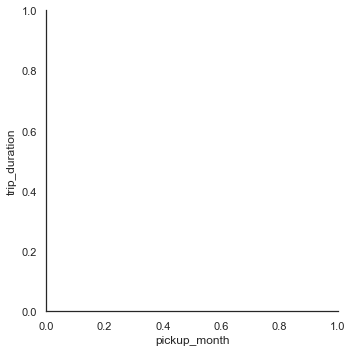

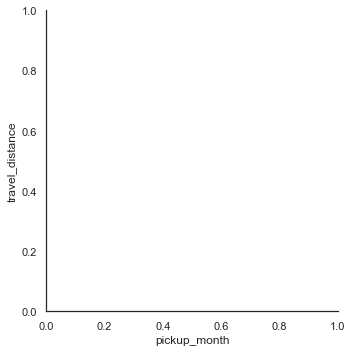

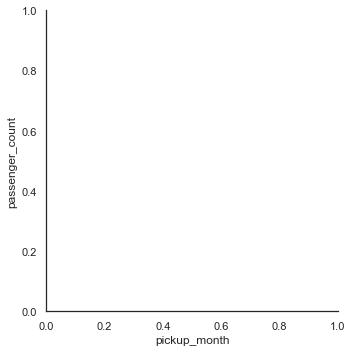

In [52]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16,5))
sns.catplot(x="pickup_month", y="trip_duration",kind="bar",data=df, ci=None, ax=ax1)
sns.catplot(x="pickup_month", y="travel_distance",kind="bar",data=df, ci=None, ax=ax2)
sns.catplot(x="pickup_month", y="passenger_count",kind="bar",data=df, ci=None, ax=ax3)
plt.show()

There is a rise in trip duration and travel distance from the first month to the sixth. Number of passengers in a vehicle remains unchanged with different months. 2 sample ttest will be tedious to perform as there more than two categories in the pickup month variable.

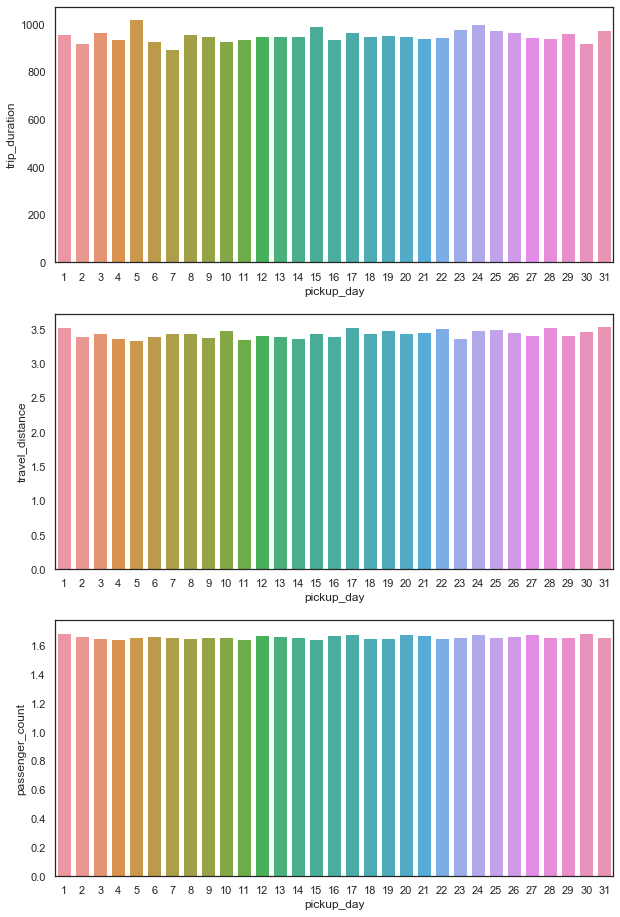

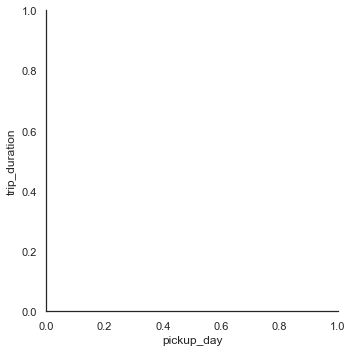

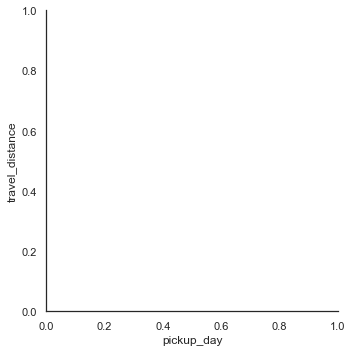

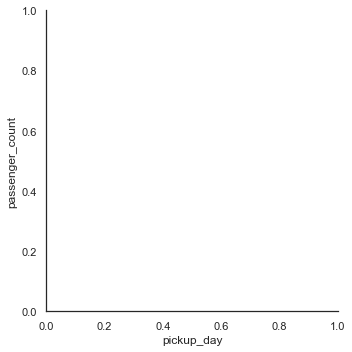

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,16))
sns.catplot(x="pickup_day", y="trip_duration",kind="bar",data=df, ci=None, ax=ax1)
sns.catplot(x="pickup_day", y="travel_distance",kind="bar",data=df, ci=None, ax=ax2)
sns.catplot(x="pickup_day", y="passenger_count",kind="bar",data=df, ci=None, ax=ax3)
plt.show()

There is a marginal increase in the trip duration and travel distance as you move from the beginning to the end of the month. Passenger count is not affected by the day of the month.

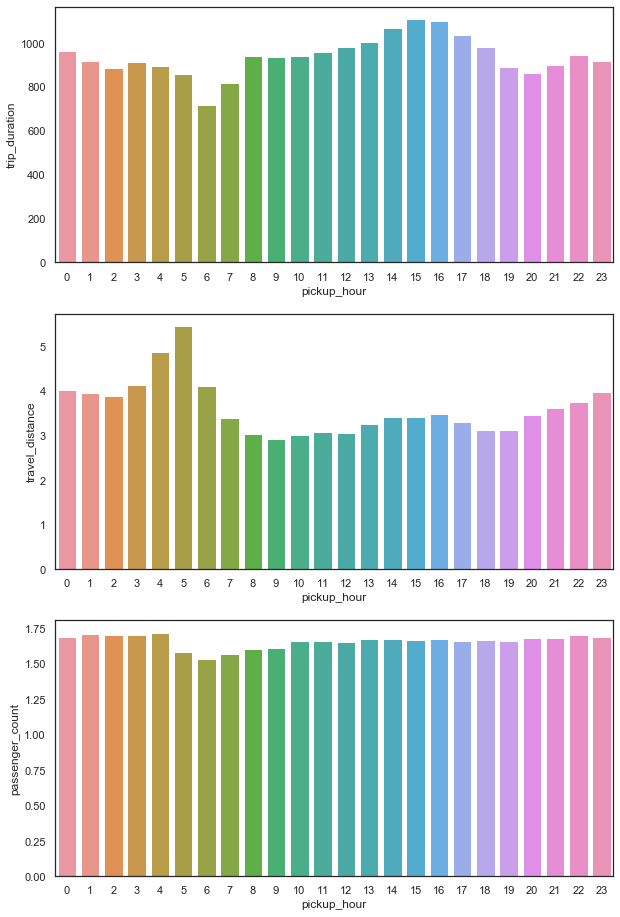

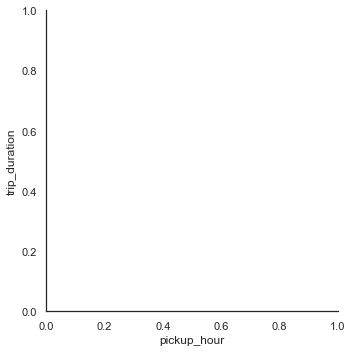

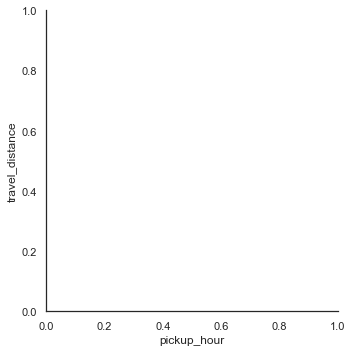

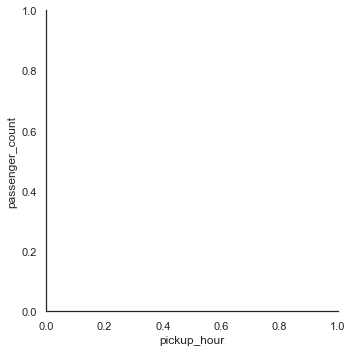

In [54]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(10,16))
sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df, ci=None, ax=ax1)
sns.catplot(x="pickup_hour", y="travel_distance",kind="bar",data=df, ci=None, ax=ax2)
sns.catplot(x="pickup_hour", y="passenger_count",kind="bar",data=df, ci=None, ax=ax3)
plt.show()

There is an interesting trend between pick_up hour  and continous variables. The average trip duration is lowest at 6:00 am and highest at 15:00 pm. trip duration increases from the morning 6:00 am, reaches the peak in the afternoon 14:00-16:00 and then drops throughout the entire night time. Travel distance is short during daytime, long at night time and even longer in the early morning 3:00-6:00. It is very interesting to see the people travel shorter distance during the day but it takes them longer. High traffic at day time should be the one of the reason for the trip to take longer. Also the store and fwd flag is higher during the day than at night time. Passengers in a vehicle are fewer in the morning between 5:00 and 9:00, and higher during other ours of the day. However a vehicle rarely  carries more than two passengers.

## Conclusion

The NYC-trip duration is a good dataset for exploratory analysis. 
One can gain a lot of initial insights. There is a relationships between both the numerical and categorical variables.
Good predictive models can be built from this dataset.